In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
students = pd.read_csv("student_scores.csv")
students.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Initial procedures to know insights about the data

In [201]:
students.shape

(30641, 15)

# Inference_1: Maths is the weakest scorer. 

In [202]:
students.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Inference_2: Data type for columns is inappropriate

In [203]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Inference_3: Data has null values

In [204]:
students.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop column: "Unnamed" because it's the index number

In [205]:
students.drop("Unnamed: 0", axis = 1, inplace = True)

In [206]:
students.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

# Checking Duplicates

In [207]:
students.duplicated(keep = False).sum()

0

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Gender Count

# Inference_4: No. of females is more than males

In [11]:
students["Gender"].isnull().sum()

0

In [12]:
students["Gender"].value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

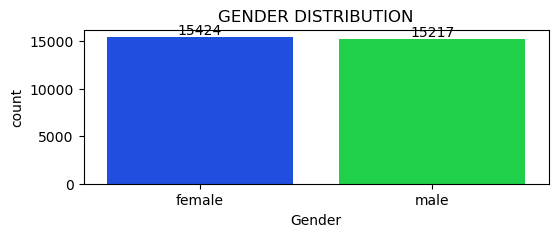

In [13]:
plt.style.use("seaborn-v0_8-bright")
plt.figure(figsize=(6,2))
ax = sns.countplot(data = students, x = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("GENDER DISTRIBUTION")
plt.show()

# Score Bifurcation based on Gender

# Inference_5 : Male stuudents score more marks in Maths whereas Females scores the highest in Reading and Writing Exam

In [14]:
gb_gender = students.groupby("Gender").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb_gender

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


# What impact of "ParentEduc" have on Student Scores?

In [15]:
students["ParentEduc"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [16]:
students["ParentEduc"].isnull().sum()

1845

In [17]:
students["ParentEduc"].fillna("Unknown",inplace= True)

In [18]:
students["ParentEduc"].notnull().sum()

30641

# Inference_5: Student score highest marks whose Parents have "master's degree". The lighter shade indicates highest marks whereas students score least with parents having "some High School degree". The same is indicated with the darkest shade.

In [19]:
gb_par_edu = students.groupby(by = "ParentEduc").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}).sort_values(by = ["MathScore", "ReadingScore", "WritingScore"], ascending = [False, False, False])
gb_par_edu

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,70.466627,73.062020,73.331069
associate's degree,68.365586,71.124324,70.299099
Unknown,66.645528,69.225474,68.295935
some college,66.390472,69.179708,68.501432
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


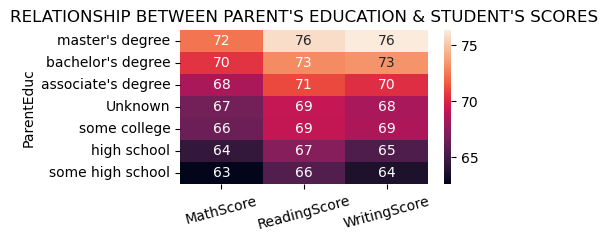

In [20]:
plt.figure(figsize=(4,2))
sns.heatmap(data = gb_par_edu, annot = True)
plt.title("RELATIONSHIP BETWEEN PARENT'S EDUCATION & STUDENT'S SCORES")
plt.xticks(rotation = 15)
plt.show()

# What impact of "ParentMaritalStatus" have on Student Scores?

# Inference_6: Parents marital status has hardly any impact on Student scores. The mean value ranges from 67 to 69 whereas "Parents Education" mean value ranges from 65 to 75.

In [23]:
students["ParentMaritalStatus"].unique()

array(['married', 'single', 'widowed', nan, 'divorced'], dtype=object)

In [24]:
students["ParentMaritalStatus"].isnull().sum()

1190

In [25]:
students["ParentMaritalStatus"].fillna("Unknown", inplace=True)

In [26]:
students["ParentMaritalStatus"].notnull().sum()

30641

In [27]:
gb_par_mar = students.groupby(by = "ParentMaritalStatus").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}). sort_values(by = ["MathScore", "ReadingScore", "WritingScore"], ascending = [False, False, False])
gb_par_mar

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
Unknown,66.548739,69.237815,68.196639
single,66.165704,69.157250,68.174440


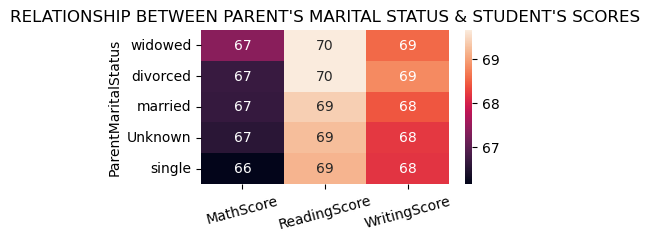

In [28]:
plt.figure(figsize=(4,2))
sns.heatmap(data = gb_par_mar, annot = True)
plt.title("RELATIONSHIP BETWEEN PARENT'S MARITAL STATUS & STUDENT'S SCORES")
plt.xticks(rotation = 15)
plt.show()

# What impact "WklyStudyHours", "TestPrep" & "PracticeSport" have on student scores?

# Inference_6: Students who study for more than 10 hours and practice sport regularly and have completed Test Prep, scored the highest marks unlike students who study for less than 5, do not practice sport neither completed Test Prep.

In [29]:
students["WklyStudyHours"].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [30]:
students["WklyStudyHours"].isnull().sum()

955

In [31]:
students["WklyStudyHours"].fillna(0, inplace=True)

In [32]:
students["WklyStudyHours"].notnull().sum()

30641

In [33]:
students["WklyStudyHours"].unique()

array(['< 5', '5 - 10', '> 10', 0], dtype=object)

In [34]:
students["WklyStudyHours"].dtypes

dtype('O')

In [35]:
students["TestPrep"].unique()

array(['none', nan, 'completed'], dtype=object)

In [36]:
students["TestPrep"].isnull().sum()

1830

In [37]:
students["TestPrep"].fillna("Unknown", inplace=True)

In [38]:
students["TestPrep"].notnull().sum()

30641

In [39]:
students["TestPrep"].dtypes

dtype('O')

In [40]:
students["PracticeSport"].unique()

array(['regularly', 'sometimes', 'never', nan], dtype=object)

In [41]:
students["PracticeSport"].isnull().sum()

631

In [42]:
students["PracticeSport"].fillna("Unknown", inplace=True)

In [43]:
students["PracticeSport"].notnull().sum()

30641

In [44]:
gb_stud_hrs = students.groupby(by = ["WklyStudyHours", "TestPrep", "PracticeSport"]).agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}). sort_index(ascending = False)

gb_stud_hrs

MathScore  ReadingScore  WritingScore
WklyStudyHours TestPrep  PracticeSport                                       
> 10           none      sometimes      66.701597     68.161661     66.305431
                         regularly      68.373276     68.653448     67.528448
                         never          64.686534     66.240618     63.858720
                         Unknown        64.597015     66.895522     65.507463
               completed sometimes      71.883939     75.021102     76.264947
                         regularly      74.140652     75.794168     77.801029
                         never          68.518325     73.172775     74.193717
                         Unknown        70.107143     73.964286     74.928571
               Unknown   sometimes      66.021277     68.156028     67.744681
                         regularly      70.750000     71.879630     71.777778
                         never          64.911111     68.888889     67.933333
                         Unknown        70.750000     67.500000     65.500000
< 5            none      sometimes      62.932101     65.997589     63.532744
                         regularly      64.315061     66.452935     65.262458
                         never          60.259091     64.209091     61.450000
                         Unknown        63.742857     65.152381     62.514286
               completed sometimes      67.267153     72.280292     72.647445
                         regularly      67.897937     72.570033     74.477742
                         never          65.652047     72.783626     71.994152
                         Unknown        68.787234     70.936170     71.617021
               Unknown   sometimes      63.944444     67.500000     66.128205
                         regularly      66.833333     69.509804     69.117647
                         never          61.509804     66.647059     63.000000
                         Unknown        72.000000     74.777778     75.000000
5 - 10         none      sometimes      64.917841     67.010874     64.850383
                         regularly      66.376627     67.745897     66.198642
                         never          63.208301     67.071261     64.267032
                         Unknown        64.990385     67.658654     65.495192
               completed sometimes      69.405703     73.631179     74.411787
                         regularly      71.206897     74.752600     76.212917
                         never          67.851852     73.132479     73.235043
                         Unknown        70.284553     75.504065     76.747967
               Unknown   sometimes      67.699597     71.018145     69.286290
                         regularly      69.381098     71.112805     70.567073
                         never          63.410072     66.438849     64.172662
                         Unknown        70.437500     72.375000     72.062500
0              none      sometimes      65.051903     67.069204     65.332180
                         regularly      67.635870     69.326087     68.250000
                         never          59.925926     62.728395     60.469136
                         Unknown        66.333333     73.416667     69.250000
               completed sometimes      68.006757     72.655405     73.587838
                         regularly      71.865079     74.730159     75.928571
                         never          68.035714     73.375000     72.410714
                         Unknown        66.375000     71.250000     71.625000
               Unknown   sometimes      65.781250     69.312500     68.437500
                         regularly      63.500000     65.916667     64.750000
                         never          63.142857     65.428571     65.142857

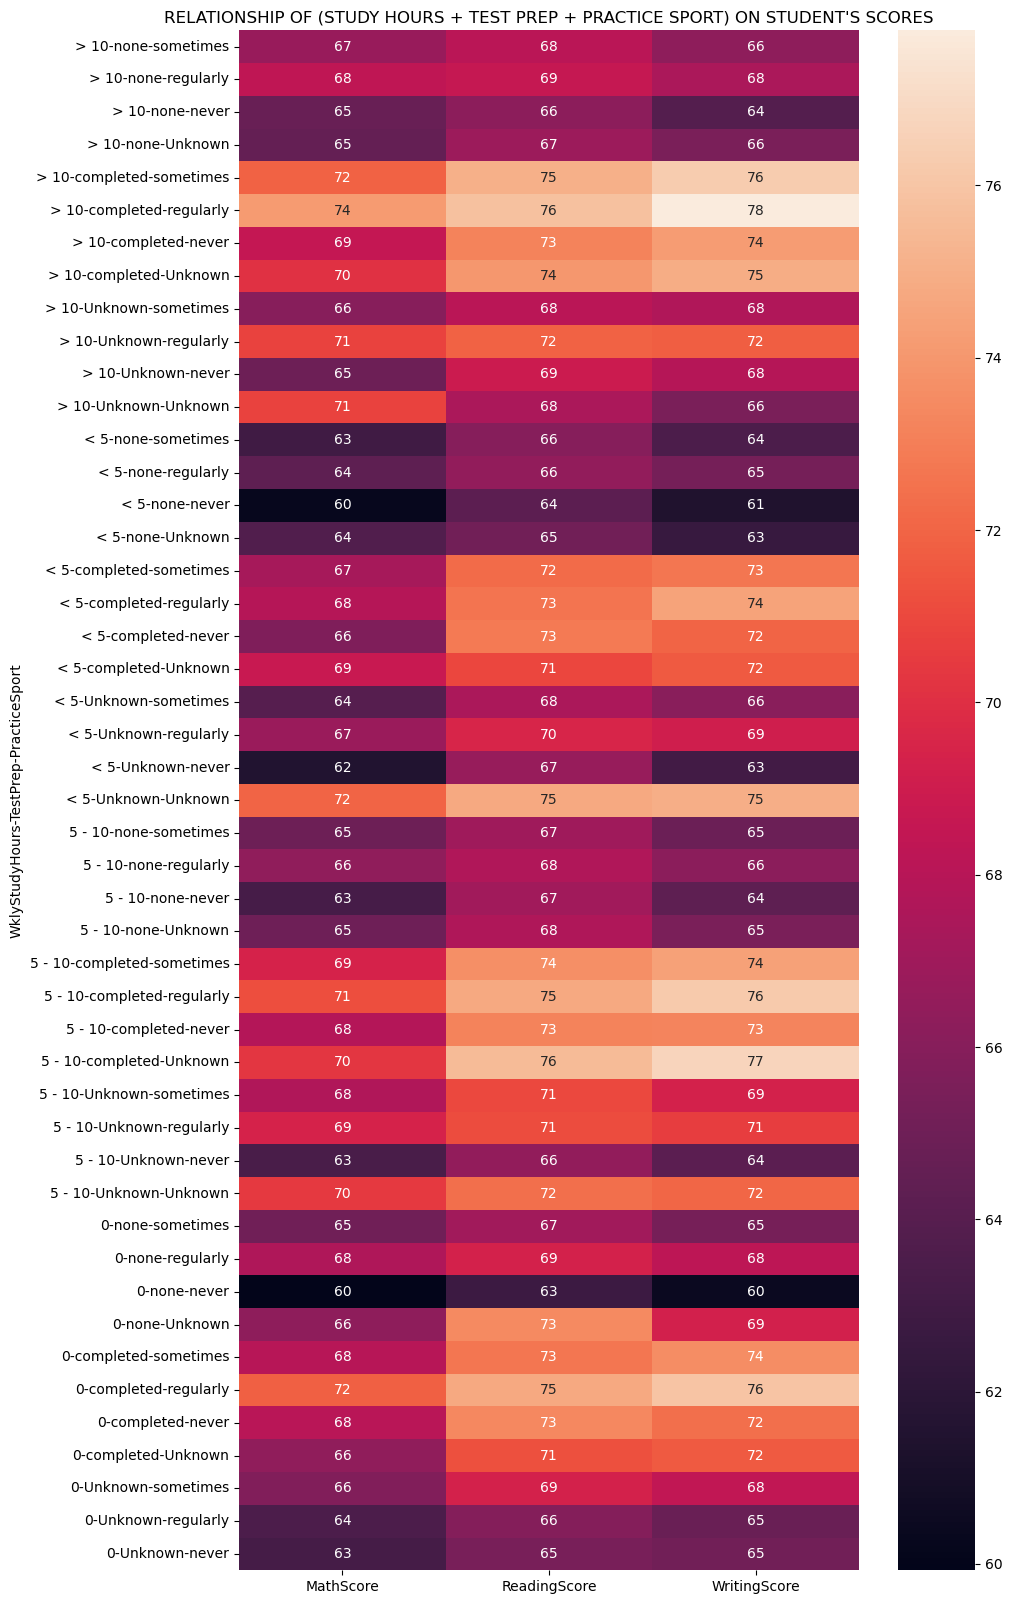

In [45]:
plt.figure(figsize=(10,20))
sns.heatmap(gb_stud_hrs, annot = True)
plt.title("RELATIONSHIP OF (STUDY HOURS + TEST PREP + PRACTICE SPORT) ON STUDENT'S SCORES")
plt.show()

In [46]:
students.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


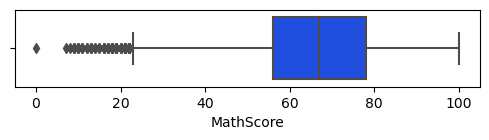

In [47]:
plt.figure(figsize= (6, 1))
sns.boxplot(data = students, x = "MathScore")
plt.show()

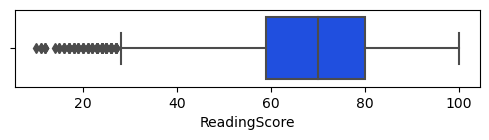

In [48]:
plt.figure(figsize= (6, 1))
sns.boxplot(data = students, x = "ReadingScore")
plt.show()

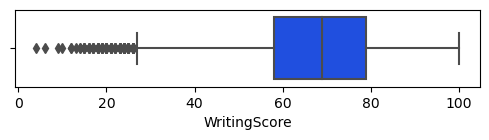

In [49]:
plt.figure(figsize= (6, 1))
sns.boxplot(data = students, x = "WritingScore")
plt.show()

# Distribution of Ethnic Groups:

In [50]:
students["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [51]:
students["EthnicGroup"].isnull().sum()

1840

In [52]:
students["EthnicGroup"].fillna("Unknown", inplace=True)

In [53]:
students["EthnicGroup"].notnull().sum()

30641

In [54]:
students["EthnicGroup"].value_counts(normalize= True).sort_values(ascending = False)

group C    0.300643
group D    0.244868
group B    0.190137
group E    0.131882
group A    0.072419
Unknown    0.060050
Name: EthnicGroup, dtype: float64

In [55]:
group_a = students.loc[students["EthnicGroup"] == "group A"].count()
group_b = students.loc[students["EthnicGroup"] == "group B"].count()
group_c = students.loc[students["EthnicGroup"] == "group C"].count()
group_d = students.loc[students["EthnicGroup"] == "group D"].count()
group_e = students.loc[students["EthnicGroup"] == "group E"].count()
group_unknown = students.loc[students["EthnicGroup"] == "Unknown"].count()

In [56]:
print("GROUP A:", group_a["EthnicGroup"])
print("GROUP B:",group_b["EthnicGroup"])
print("GROUP C:",group_c["EthnicGroup"])
print("GROUP D:",group_d["EthnicGroup"])
print("GROUP E:",group_e["EthnicGroup"])
print("GROUP UNKNOWN:",group_unknown["EthnicGroup"])

GROUP A: 2219
GROUP B: 5826
GROUP C: 9212
GROUP D: 7503
GROUP E: 4041
GROUP UNKNOWN: 1840


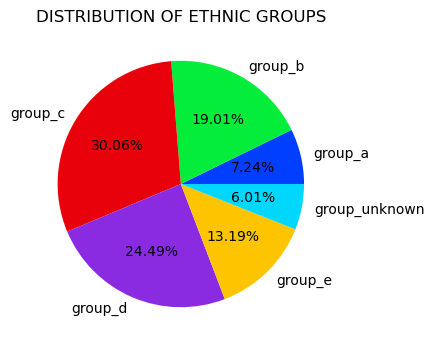

In [57]:
plt.figure(figsize= (4, 4))
mylist = [group_a["EthnicGroup"], group_b["EthnicGroup"], group_c["EthnicGroup"], group_d["EthnicGroup"], group_e["EthnicGroup"], group_unknown["EthnicGroup"]]
l = ["group_a", "group_b", "group_c", "group_d", "group_e", "group_unknown"]
plt.pie(mylist, labels = l, autopct = "%1.2f%%")
plt.title("DISTRIBUTION OF ETHNIC GROUPS")
plt.show()

In [58]:
score_by_group = students.groupby(["EthnicGroup"]).agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}). sort_values(by = "MathScore", ascending = False)
score_by_group

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.298936,74.251423,72.677060
group D,67.666400,70.382247,70.890844
Unknown,66.185870,68.915761,67.900543
group C,64.695723,68.438233,66.999240
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


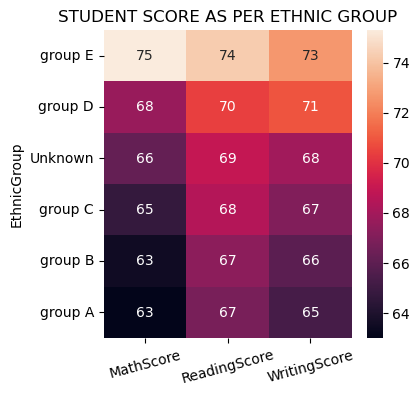

In [59]:
plt.figure(figsize= (4, 4))
plt.title("STUDENT SCORE AS PER ETHNIC GROUP")
sns.heatmap(score_by_group, annot = True)
plt.xticks(rotation = 15)
plt.show()

In [60]:
students.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [64]:
students["MathScore"].unique()

array([ 71,  69,  87,  45,  76,  73,  85,  41,  65,  37,  58,  40,  66,
        80,  48,  88,  18,  46,  50,  42,  74,  75,  70,  63,  56,  97,
        81,  51,  77,  53,  59,  60,  67,  82,  54,  33,  84,  52,  61,
         0,  39,  62,  64,  47,  44,  28,  49,  57,  27,  68,  79, 100,
        72,  98,  55,  90,  86,  89,  21,  96,  91,  99,  83,  35,  43,
        93,  78,  94,  36,  29,  23,  92,  26,  38,  95,  30,  32,   8,
        34,  31,  25,  22,  17,  20,  16,  19,  24,  15,  11,  12,  13,
         9,  10,   7,  14], dtype=int64)

In [236]:
student_score = students["MathScore"] + students["ReadingScore"] + students["WritingScore"] 

In [246]:
passing_students = students[student_score >= 180]["Gender"].value_counts()
passing_students

female    11676
male      10207
Name: Gender, dtype: int64

In [293]:
11676 + 10207

21883

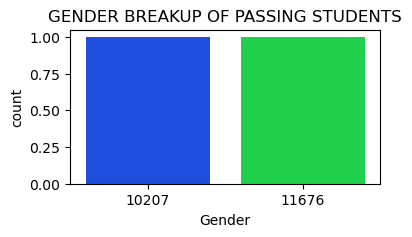

In [264]:
plt.figure(figsize = (4, 2))
plt.title("GENDER BREAKUP OF PASSING STUDENTS")
ax = sns.countplot(data = students, x = passing_students)
plt.show()
